# Категоризация товаров интернет-магазина 

Данный проект - часть большого проекта по анализу показателей интернет-магазина.<br>
В проекте ниже представлен процесс категоризации товаров посредствам библиотек Python путем замены слов в названиях товаров и создания словарей значений. <br>
<br>
<b>Задачи проекта:</b> <br>
- присвоить товарам интернет-магазина категории (5-7 категорий) исходя из названий

<b>Содержание проекта:</b><br>
1. Общая информация<br>
2. Категоризация товаров<br>
3. Общий вывод<br>

### Общая информация

In [1]:
# загрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
# настройки для отображения полных значений строк / массивов
pd.set_option('display.max_colwidth', None)
import sys
np.set_printoptions(threshold = sys.maxsize)

<b>Описание столбцов датасета:</b> <br>
- product — наименование товара<br>
- quantity — количество товаров, проданных за период в 16 месяцев<br>
- revenue — выручка за данный товар за период в 16 месяцев<br>
<br>
**данный датасет сформирован для части проекта на основании данных по продажам

In [2]:
data = pd.read_csv('products.csv')
data = data.drop(columns='Unnamed: 0')
# проверка корректности закгруженных данных
display(data.head())

,product,quantity,revenue
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,2,4798.0
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,1,2399.0
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,2,4198.0
3,Ёрш бутылочный с металлической ручкой малый Y64 1807002,10,220.0
4,"Ёрш для бутылки из натурального волокна и металла 23 см кремовый, Burstenmann, 0473/0003",10,1420.0


In [3]:
# получение информации о датасете
print('Кол-во строк/столбцов:',data.shape)
print('Кол-во пропусков:',data.isna().sum())
print('Кол-во дубликатов:',data.duplicated().sum())

Кол-во строк/столбцов: (2343, 3)
Кол-во пропусков: product     0
quantity    0
revenue     0
dtype: int64
Кол-во дубликатов: 0


<div class="alert alert-info">
<b>Вывод по разделу №1:</b> <br>
Получена база в 2343 названия товара, написаных в единую строку с полной информацией о товаре <br>
Дополнительно имеются данные по кол-ву проданных товаров и выручке за период

### Категоризация товаров

Присвоение категории товарам будет произведено в несколько этапов: <br>
- 1) удаление из названий товаров предлогов и слов с количеством товара   <br>
- 2) добавление столбца с кратким названием товара в 2 слова <br>
- 3) удаление прилагательных и замена позиций, которые не могут быть сокращены до 1 слова без потери смысла <br>
- 4) добавление столбца с кратким названием товара в 1 слово  <br>
- 5) разбивка товаров по категориям через словарь и группировку <br>
- 6) анализ доли продаж по категориям и корректировка (при необходимости)<br>

<b>Предобработка: приведение названий товаров к строчным буквам </b>

In [4]:
# перевод заглавных букв в строчные
data['product'] = data['product'].str.lower()

<b>Шаг 1: удаление предлогов и слов с количеством товара</b>

In [5]:
# создание функции для удаления предлогов и замена их на пробел 
def replace_prepositions (row):
    replace = [' для ', ' в ', ' из ']
    for i in replace: 
        row = row.replace(i,' ')
    return row
# создание функции для удаление слов, которые определяют кол-во товаров 
def replace_words (row):
    replace = ['набор ', 'комплект ']
    for i in replace: 
        row = row.replace(i,'')
    return row
# применение функции - создание нового столбца
data['product_filtered'] = data['product'].apply(replace_prepositions)
data['product_filtered'] = data['product_filtered'].apply(replace_words)
# проверка работы функций
display(data.head())

,product,quantity,revenue,product_filtered
0,tepмокружка avex freeflow 700 мл зеленый avex0759,2,4798.0,tepмокружка avex freeflow 700 мл зеленый avex0759
1,tepмокружка avex freeflow 700 мл сталь avex0776,1,2399.0,tepмокружка avex freeflow 700 мл сталь avex0776
2,tepмокружка avex recharge 500 мл голубой avex0681,2,4198.0,tepмокружка avex recharge 500 мл голубой avex0681
3,ёрш бутылочный с металлической ручкой малый y64 1807002,10,220.0,ёрш бутылочный с металлической ручкой малый y64 1807002
4,"ёрш для бутылки из натурального волокна и металла 23 см кремовый, burstenmann, 0473/0003",10,1420.0,"ёрш бутылки натурального волокна и металла 23 см кремовый, burstenmann, 0473/0003"


<b>Шаг 2: краткое название товара в 2 слова</b>

In [6]:
# создание функции по скоращению названия товара до 2х слов
def short_name (row):
    row = row.split(' ')
    return row[0] + ' ' + row[1] 
# создание нового столбца из 2х слов названия товара
data['short_name'] = data['product_filtered'].apply(short_name)
# проверка работы функции
display(data.head(1))

,product,quantity,revenue,product_filtered,short_name
0,tepмокружка avex freeflow 700 мл зеленый avex0759,2,4798.0,tepмокружка avex freeflow 700 мл зеленый avex0759,tepмокружка avex


In [7]:
# анализ кратких названий товаров в 2 слова
print('Кол-во уникальных названий товаров длинной в 2 слова:', data['short_name'].nunique())
display(data['short_name'].sort_values().unique())

Кол-во уникальных названий товаров длинной в 2 слова: 980


array(['tepмокружка avex', 'vileda easy', 'автоматическая щетка',
       'агератум рассада', 'адиантум лиза', 'азалия индика',
       'аквилегия махровая', 'аквилегия обыкновенная',
       'алиссум (лобулярия)', 'алиссум рассада', 'алиссум скальный',
       'алоэ вера', 'альбука спиралис', 'амариллис red', 'анемона белый',
       'антижир posh', 'антинакипин утюгов', 'антуриум андрианум',
       'антуриум тропик', 'аптения d-10', 'аптения d-12',
       'арбуз волгоградец', 'арбуз огонек', 'арбуз сибирские',
       'арбуз холодок', 'арбуз шуга', 'аргирантерум рассада',
       'ароматизированное средство', 'артемизия (полынь',
       'аспарагус d-12', 'аспарагус спренжери', 'астра альпийская',
       'астра рассада', 'афеляндра скуарроса', 'бадан сердцелистный',
       'базилик застольный', 'базилик зеленый', 'базилик овощной',
       'базилик пурпурные', 'базилик смесь', 'бак белья',
       'баклажан самурай', 'бакопа ампельная', 'бакопа ампельная,',
       'бальзам мытья', 'бальзамин в

<b>Шаг 3: удаление прилагательных и замена позиций, которые не могут быть сокращены до 1 слова без потери смысла</b>

In [8]:
# создание функции по удалению прилагательных
def replace_adjectives (row):
    replace = ['автоматическая ','ароматизированное ','готовая ','двуспальное ','девичий ',
               'жестяная ','жидкое ','запасная ','защитная ','защитный ','комнатное ','кухонное ',
               'многофункциональный ','махровое ','махровый ','махровых ','модульная стеклянная ','настенная ','настольная ',
               'однолетнее ','постельное ','постельного ','пряные ','стеклянная ','подвесное ','складная ','складной ',
               'стиральный ','сменная ','сменный ','стеклянная ','столовая ','столовый ','столовых ','универсальное ',
               'универсальный ','увлажняющая ','холодная ','фарфоровая ','чайная ','эмалированных ']                  
    for i in replace: 
        row = row.replace(i,'')
    return row
# создание функции по замене слов, которые нельзя сократить до 1 слова без потери смысла, на сочетания в 1 слово
def replace_names (row):
    replace_names = ('доска гладильная','доска_гладильная'),('доска разделочная','доска_разделочная'),
    ('коврик кухонный','коврик_кухонный'),('гель стирки', 'стирки'),('подставка ножей','подставка_ножей'),
    ('подставка обуви','подставка_обуви'),('подставка цветов','подставка_цветов'), ('подставка яйца','подставка_яйца' )
    for i,j in replace_names: 
        row = row.replace(i,j)
    return row
# применение функций
data['short_name'] = data['short_name'].apply(replace_adjectives)
data['short_name'] = data['short_name'].apply(replace_names)

<b>Шаг 4: украткое название товара в 1 слово</b>

In [9]:
# создание функции по скоращению названия товара до 1 слова
def short_name_one (row):
    row = row.split(' ')
    return row[0]
# создание нового столбца из названия товара в 1 слово
data['short_name_one_word'] = data['short_name'].apply(short_name_one)
# проверка работы функции
display(data.head(1))

,product,quantity,revenue,product_filtered,short_name,short_name_one_word
0,tepмокружка avex freeflow 700 мл зеленый avex0759,2,4798.0,tepмокружка avex freeflow 700 мл зеленый avex0759,tepмокружка avex,tepмокружка


In [10]:
# анализ кратких названий товаров в 1 слово для дальнейшего создания словарей
print('Кол-во уникальных названий товаров в 1 слово:',data['short_name_one_word'].nunique())
print(data['short_name_one_word'].sort_values().unique())

Кол-во уникальных названий товаров в 1 слово: 463
['tepмокружка' 'vileda' 'агератум' 'адиантум' 'азалия' 'аквилегия'
 'алиссум' 'алоэ' 'альбука' 'амариллис' 'анемона' 'антижир' 'антинакипин'
 'антуриум' 'аптения' 'арбуз' 'аргирантерум' 'артемизия' 'аспарагус'
 'астра' 'афеляндра' 'бадан' 'базилик' 'бак' 'баклажан' 'бакопа' 'бальзам'
 'бальзамин' 'банка' 'барвинок' 'бархатцы' 'бегония' 'бельевые' 'белья'
 'бензин' 'бидон' 'биопорошок' 'блок' 'блюдо' 'блюдце' 'бокалов' 'буддлея'
 'бузульник' 'бульонница' 'ваза' 'вакуумный' 'валериана' 'ванна' 'ванной'
 'вантуз' 'ведро' 'веник' 'венчик' 'вербейник' 'вербена' 'веревка'
 'вероника' 'весы' 'вешалка' 'вешалка-перекладина' 'вешалка-плечики'
 'вешалка-стойка' 'вешалка-сушилка' 'вешалки' 'вешалок' 'вигна' 'вилка'
 'виноград' 'виола' 'вкладыши' 'газания' 'гайлардия' 'гардения' 'гвоздика'
 'георгина' 'герань' 'гербера' 'гиацинт' 'гимнокалициум' 'гиностемма'
 'гипоаллергенный' 'гипсофила' 'гладильная' 'глоксиния' 'годеция' 'горох'
 'гортензия' 'губ

In [11]:
# дополнительный анализ названий товаров в 1 слово, которые вызывают сомнения по их категории
display(data[data['short_name_one_word'] == 'vileda'].head(1))

,product,quantity,revenue,product_filtered,short_name,short_name_one_word
857,набор vileda easy wring & clean turbo 151153 в коробке швабра и ведро с педальным отжимом,2,5848.0,vileda easy wring & clean turbo 151153 коробке швабра и ведро с педальным отжимом,vileda easy,vileda


<b>Шаг 5: разбивка товаров по категориям через словарь и группировку</b>

In [12]:
# создание словарей для дальнейшей категоризации товаров
flowers = ['агератум','адиантум','азалия','аквилегия','алиссум','алоэ','альбука','амариллис','анемона','антуриум','аптения',
           'арбуз','аргирантерум','артемизия','аспарагус','астра','афеляндра','бадан','базилик','баклажан','бакопа','бальзамин',
           'барвинок','бархатцы','бегония','бузульник','буддлея','валериана','вербейник','вербена','вероника','виноград','виола',
           'вигна','газания','гайлардия','гардения','гвоздика','георгина','герань','гербера','гиацинт','гимнокалициум','гиностемма',
           'гипсофила','глоксиния','годеция','горох','гортензия','декабрист','дендробиум','джункус','диффенбахия','драцена','душица',
           'дыня','ель','замиокулькас','зверобой','земляника','змееголовник','импатиенс','иссоп','кабачок','каланхое','калатея',
           'календула','калибрахоа','калла','каллуна','калоцефалус','камнеломка','кампанула','капсикум','капуста','кипарисовик',
           'клен','клубника','ключница','кодонанта','колеус','колокольчик','кореопсис','кориандр','космея','котовник','кофе',
           'крассула','крокусы','лаванда','лаватера','лавр','лантана','лапчатка','левкой','лилейник','литопс','лобелия','лук',
           'львиный','любисток','маттиола','мединилла','мелисса','мимоза','мирт','многолетнее','молодило','монарда','морковь',
           'муррайя','мускари','мята','настурция','незабудка','нефролепис','нивянник','нолина','овсянница','огурец','осина',
           'папоротник','патиссон','пахира','пеларгония','пеперомия','петрушка','петуния','пиретрум','платикодон','подсолнечник',
           'портулак','примула','пуансетия','пуансеттия','радермахера','ранункулус','рассада','растение','роза','розмарин','рудбекия',   
           'травы','салат','седум','сельдерей','сальвия','сантолина','синнингия','скиммия','смолевка','соланум','солидаго',
           'спатифиллум','суккулент','сциндапсус','табак','тагетис','тимьян','томат','томата','тыква','тюльпан','укроп',
           'фаленопсис','фатсия','фиалка','физостегия','фикус','фиттония','флокс','фуксия','хамедорея','хлорофитум','хоста',
           'хризантема','хризолидокарпус','цветущее','целозия','цикламен','цикламен,','цинерания','цинерария','циния','цинния',
           'циперус','цитрофортунелла','чабер','шалфей','шеффлера','эвкалипт','энотера','эпипремнум','эхеверия','эхинацея',
           'эхинокактус','эшшольция','юкка','ясколка']
household = ['vileda','антижир','антинакипин','бак','бальзам','бензин','бидон','биопорошок','блок','вакуумный','ванна',
                   'ванной','вантуз','ведро','веник','веревка','весы','вешалка','вешалка-перекладина','вешалка-плечики',
                   'вешалка-стойка','вешалка-сушилка','вешалки','вешалок','вкладыши','гипоаллергенный','гладильная','губка',
                   'держатель','дозатор','доска_гладильная','емкость', 'ерш','ёрш','завертка','зубная','измерительный',
                   'инструмент','инструментов','карниз','картонная','кисточка','кольца','кондиционер','контейнер','концентрат',
                   'корзина','корзинка','короб','коробка','корыто','котел','кофр','крепеж','крючок','лен',
                   'лестница','лестница-стремянка','линейка,','маска','мыло','мыло-скраб','мешок','мусорный',
                   'модульная','мыльница','мытья','насадка','насадка-моп','насадка-отжим','нетканые','окномойка','ополаскиватель',
                   'основание','отбеливатель','отжим','перчатки','паста','пена','петля','петля-стрела','пикника','плечики',
                   'подголовник','подкладка','подрукавник','покрытие','прецизионных','прищепки','прищепок','пробка','пружина',
                   'пьезозажигалка','рассекатель','решетка','ролик','рукав','ручка','ручка-скоба','сварка','сверел',
                   'сверло','сверло-фреза,','светильник','сетка','сиденье','сметка','совок','соль','средство','стиральный',
                   'стирки','стремянка','стремянка-табурет','стремянки','стяжка','стяжки','сумка','сумка-тележка',
                   'сушилка','таз','тележка','термометр','ткань','тряпка','тряпкодержатель','уголок','урна','урна-пепельница',
                   'фал','фиксатор-шар','чехол','чистящий','швабра','шило','шнур','шпагат','шпингалет','шприц','штанга',
                   'штангенциркуль','щетка','щетка-сметка','щетка-утюжок','щётка','экран','ящик']                   
technics = ['пылесос','утюг','фен']                  
furniture = ['детский','комод','обувница-3','подставка_обуви','подставка','полка','полки','стеллаж','этажерка']
textile = ['бельевые','белья','белье','ковер','коврик','ковров','ковёр','наволочка','наматрасник','наматрацник','наматрицник-чехол',
           'одеяло','плед','пододеяльник','постельное','подушка','покрывало','полотенец','полотенце','простынь','простыня','халат','штора']
decor = ['ваза', 'декоративная', 'искусственная','искусственный','кашпо','муляж','новогоднее','подарочный','подставка_цветов',
         'фоторамка','цветок']
dishes = ['блюдо','блюдце','бокалов','бульонница','вилка','кастрюля','ковш','кружек','кружка','крышка','кувшин','ложка',
          'лопатка','мини-сковорода','миска','нож','ножей','приборов','половник' ,'посуды','салатников','салатник',
          'сковорода','стакан','стаканов','тарелка','терка','термокружка','tepмокружка','термос','термостакан','фужеров',
          'чайник','чайный']
kitchen = ['банка','венчик','доска_разделочная','измельчитель', 'картофелемялка','кипятильник','кухонные','кухонных','лоток',
           'мантоварка','мантоварка-пароварка','миксер','масленка','мерный','ножеточка','овощечистка','овощеварка',
           'орехоколка','отделитель','подставка_ножей','подставка_яйца','пресс','просеиватель','противень','разделочная',
           'рыбочистка','салфетка','салфетница','салфеток','сервировочная','сито','скалка','скребок','скатерть','сахарница',
           'соковарка','соковыжималка','сотейник','толкушка','тортница','форм','форма','хлебница','электроштопор']

In [13]:
# создание функции для категоризации товаров на основании словарей
def category (row):
    if row in flowers:
        return 'Растения'
    if row in household:
        return 'Хозтовары'
    if row in technics:
        return 'Техника'
    if row in furniture:
        return 'Мебель'
    if row in textile:
        return 'Текстиль'   
    if row in decor:
        return 'Декоративные товары'
    if row in dishes:
        return 'Посуда'
    if row in kitchen:
        return 'Кухонные принадлежности'
    return 'другое'
# применение функции - создание нового столбца с категорией товара
data['category'] = data['short_name_one_word'].apply(category)
# проверка корректности работы функции
print(data['category'].unique())

['Посуда' 'Хозтовары' 'Растения' 'Кухонные принадлежности' 'Текстиль'
 'Декоративные товары' 'Мебель' 'Техника']


<b>Выводы:</b> <br>
Функция по добавлению товарам категорий отработала корректно: товары в датасете сгруппированы по 8 различным категориям: 'Растения', 'Хозтовары', 'Посуда', 'Декоративные товары', 'Текстиль', 'Кухонные принадлежности', 'Техника', 'Мебель' <br>

In [14]:
# дополнительно проверим корректность работы функции по одной из небольших категорий - выведем названия продуктов
#display(data[data['category'] == 'Мебель']['product'].unique())

<b>Шаг 6: анализ доли продаж по категориям и корректировка (при необходимости)</b>

In [15]:
# группировка данных по объему и выручке по категориям товара
product_category = data.groupby('category').agg(
    {'product':'nunique','quantity':'sum','revenue':'sum'})
product_category.columns = ['unique_products','total_quantity','total_revenue']
product_category['total_revenue'] = round(product_category['total_revenue'],2)
# дополнительные расчеты долей
product_category['total_quantity_share'] = round(product_category['total_quantity'] / product_category['total_quantity'].sum(),3)
product_category['total_revenue_share'] = round(product_category['total_revenue'] / product_category['total_revenue'].sum(),3)
display(product_category.sort_values(by='total_revenue_share',ascending= False))

,unique_products,total_quantity,total_revenue,total_quantity_share,total_revenue_share
category,,,,,
Хозтовары,771,7008,3417237.42,0.398,0.643
Растения,901,5531,733612.83,0.314,0.138
Текстиль,171,631,459010.50,0.036,0.086
Посуда,195,1127,223178.00,0.064,0.042
Декоративные товары,160,2773,188381.33,0.158,0.035
Кухонные принадлежности,112,449,177685.00,0.026,0.033
Мебель,26,66,110617.00,0.004,0.021
Техника,5,5,6956.00,0.000,0.001


<b>Выводы:</b> <br>
На основании данных по продажам товаров по категориям можно сделать объединение категорий:<br>
=> объединить категории "Посуда" и "Кухонные принадлежности" (их доля по отдельности по выручке менее 5%) в "Товары для кухни"<br>
=> "Декоративные товары" сохранить как отдельную категорию (их доля в выручке небольшая, но доля в кол-ве товаров составляет 17%)<br>
=> категории "Мебель" и "Техника" (доля по выручке 2% и 0,01%) объединить с категорией "Хозтовры" и переименовать в "Товары для дома" <br>

In [16]:
# создание функции для новой категоризации товаров (укрупнение категорий)
house_goods = ['Хозтовары','Мебель','Техника']
kitchen_goods = ['Посуда','Кухонные принадлежности']
def category_2 (row):
    if row in house_goods:
        return 'Товары для дома'
    if row in kitchen_goods:
        return 'Товары для кухни'
    return row
# создание нового столбца с категорией
data['category_2'] = data['category'].apply(category_2)
# проверка работы функции
print(data['category_2'].unique())

['Товары для кухни' 'Товары для дома' 'Растения' 'Текстиль'
 'Декоративные товары']


<b>Выводы:</b> <br>
Проведено укрупнение категорий товаров до 5 категорий: 'Товары для кухни', 'Товары для дома', 'Растения', 'Текстиль', 'Декоративные товары' <br>

,unique_products,total_quantity,total_revenue,product_share,total_quantity_share,total_revenue_share
category_2,,,,,,
Товары для дома,802,7079,3534810.42,0.343,0.402,0.665
Растения,901,5531,733612.83,0.385,0.314,0.138
Текстиль,171,631,459010.50,0.073,0.036,0.086
Товары для кухни,307,1576,400863.00,0.131,0.090,0.075
Декоративные товары,160,2773,188381.33,0.068,0.158,0.035


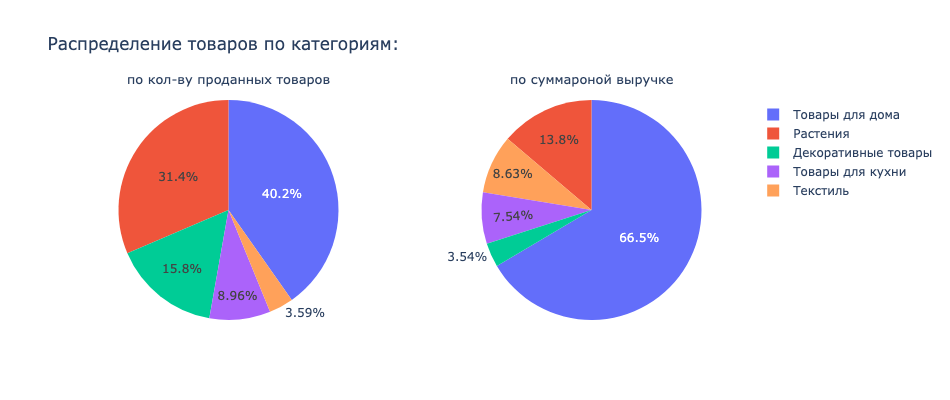

In [17]:
# группировка данных по обновленным категориям и расчеты показателей
product_category_2 = data.groupby('category_2').agg(
    {'product':'nunique','quantity':'sum','revenue':'sum'})
product_category_2.columns = ['unique_products','total_quantity','total_revenue']
product_category_2['total_revenue'] = round(product_category_2['total_revenue'],2)
# дополнительные расчеты долей категорий
product_category_2['product_share'] = round(product_category_2['unique_products'] / product_category_2['unique_products'].sum(),3)
product_category_2['total_quantity_share'] = round(product_category_2['total_quantity'] / product_category_2['total_quantity'].sum(),3)
product_category_2['total_revenue_share'] = round(product_category_2['total_revenue'] / product_category_2['total_revenue'].sum(),3)
display(product_category_2.sort_values(by='total_revenue_share',ascending= False))
# визуализация распределения товаров по категориям
fig = make_subplots(
    rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]],
    subplot_titles=('по кол-ву проданных товаров', 'по суммароной выручке'))
fig.add_trace(go.Pie(
   values=product_category_2['total_quantity'],
   labels=product_category_2.index), row=1, col=1)
fig.add_trace(go.Pie(
   values=product_category_2['total_revenue'],
   labels=product_category_2.index), row=1, col=2)
fig.update_layout(
    title_text='Распределение товаров по категориям:',
    width=950, height=400)
fig.update_annotations(font_size=13, y=1.05)
fig.show(renderer='png', width = 950, height = 400)

<b>Выводы:</b> <br>
- по кол-ву проданных за весь период лидируют: "Товары для дома", "Растения" и "Декоративные товары"  <br>
- по суммарной выручке за весь период лидируют: "Товары для дома" (66,5%), остальные категрии не превышают по выручке 14%  <br>

<div class="alert alert-info">
<b>Вывод по разделу №1:</b> <br>
- Проведена категоризация товаров в несколько этапов и выделены 8 категорий <br>
- На основании данных по продажам 8 категорий укрупнены до 5 категорий

### Общий вывод

<br>
Данный проект является частью большой задачи по анализу показателей интеренет-магазина.<br>
Для удобства анализа товары разбиты на 5 категорий. При дальнейшем появлении новых товаров их можно будет также отнести к существующим категориям посредствам получившегося кода: сокращение названия товара до 1 слова и подбор категории по словарю.
